In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

file_path = './Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df = pd.read_csv(file_path, encoding='latin-1')
df.head()

,Area Code,Area Code (M49),Area,Continent,Months Code,Months,Element Code,Element,Unit,Y1961,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,2,'004,Afghanistan,Asia,7001,January,7271,Temperature change,°c,0.745,...,1.716,2.017,3.594,1.367,2.111,2.911,-0.547,0.701,2.458,-2.200
1,2,'004,Afghanistan,Asia,7001,January,6078,Standard Deviation,°c,1.954,...,1.954,1.954,1.954,1.954,1.954,1.954,1.954,1.954,1.954,1.954
2,2,'004,Afghanistan,Asia,7002,February,7271,Temperature change,°c,-1.787,...,-3.020,2.696,2.448,0.000,2.774,0.147,2.544,4.220,2.502,3.697
3,2,'004,Afghanistan,Asia,7002,February,6078,Standard Deviation,°c,2.591,...,2.591,2.591,2.591,2.591,2.591,2.591,2.591,2.591,2.591,2.591
4,2,'004,Afghanistan,Asia,7003,March,7271,Temperature change,°c,0.445,...,-0.073,-0.465,2.468,0.994,4.632,0.360,0.664,2.625,3.756,3.895


In [261]:
df['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

In [262]:
def analyze_dataframe(df):
    # Bước 1: Lấy số lượng hàng và cột
    num_rows, num_columns = df.shape
    print(f"Number of rows: {num_rows}")  # In ra số lượng hàng
    print(f"Number of columns: {num_columns}")  # In ra số lượng cột

    # Bước 2: Tạo DataFrame với thông tin cột: tên cột, kiểu dữ liệu và số giá trị duy nhất
    column_info = df.dtypes.to_frame(name='Data Type').join(df.nunique().to_frame(name='Unique Values'))

    # Bước 3: Phân loại kiểu dữ liệu của các cột
    def classify_column(col_name, data_type, unique_values):
        # Nếu kiểu dữ liệu là object thì là Categorical
        if data_type == 'object':
            return 'Categorical'
        # Nếu kiểu dữ liệu là int64 hoặc float64
        elif data_type in ['int64', 'float64']:
            if unique_values < 0.05 * num_rows:  # Dựa trên số lượng giá trị duy nhất
                return 'Categorical'
            else:
                return 'Numerical'
        else:
            return 'Categorical'

    # Thêm cột phân loại kiểu dữ liệu
    column_info['Category'] = column_info.apply(
        lambda row: classify_column(row.name, row['Data Type'], row['Unique Values']), axis=1
    )

    # In thông tin chi tiết
    print(column_info)

    return num_rows, num_columns, column_info

num_rows, num_columns, column_info = analyze_dataframe(df)

Number of rows: 9656
Number of columns: 72
                Data Type  Unique Values     Category
Area Code           int64            284  Categorical
Area Code (M49)    object            284  Categorical
Area               object            284  Categorical
Continent          object              9  Categorical
Months Code         int64             17  Categorical
...                   ...            ...          ...
Y2019             float64           2749    Numerical
Y2020             float64           2764    Numerical
Y2021             float64           2691    Numerical
Y2022             float64           2847    Numerical
Y2023             float64           2957    Numerical

[72 rows x 3 columns]


In [263]:
# Reshaping the data: Converting year columns (Y1961 to Y2023) from wide to long format
reshaped_data = df.melt(
    id_vars=['Area Code', 'Area Code (M49)', 'Area', 'Continent', 'Months Code', 
             'Months', 'Element Code', 'Element', 'Unit'],
    var_name='Year',
    value_name='TempC'
)
reshaped_data.head()

,Area Code,Area Code (M49),Area,Continent,Months Code,Months,Element Code,Element,Unit,Year,TempC
0,2,'004,Afghanistan,Asia,7001,January,7271,Temperature change,°c,Y1961,0.745
1,2,'004,Afghanistan,Asia,7001,January,6078,Standard Deviation,°c,Y1961,1.954
2,2,'004,Afghanistan,Asia,7002,February,7271,Temperature change,°c,Y1961,-1.787
3,2,'004,Afghanistan,Asia,7002,February,6078,Standard Deviation,°c,Y1961,2.591
4,2,'004,Afghanistan,Asia,7003,March,7271,Temperature change,°c,Y1961,0.445


In [264]:
# Removing the 'Y' character from the 'Year' column and converting it to numeric
reshaped_data['Year'] = reshaped_data['Year'].str.lstrip('Y').astype(int)
reshaped_data.head()

,Area Code,Area Code (M49),Area,Continent,Months Code,Months,Element Code,Element,Unit,Year,TempC
0,2,'004,Afghanistan,Asia,7001,January,7271,Temperature change,°c,1961,0.745
1,2,'004,Afghanistan,Asia,7001,January,6078,Standard Deviation,°c,1961,1.954
2,2,'004,Afghanistan,Asia,7002,February,7271,Temperature change,°c,1961,-1.787
3,2,'004,Afghanistan,Asia,7002,February,6078,Standard Deviation,°c,1961,2.591
4,2,'004,Afghanistan,Asia,7003,March,7271,Temperature change,°c,1961,0.445


In [265]:
# Dropping the specified columns
columns_to_drop = ['Area Code', 'Area Code (M49)', 'Months Code', 'Unit', 'Element Code']
reshaped_data = reshaped_data.drop(columns=columns_to_drop)

# Display the first few rows of the updated dataset
reshaped_data.head()


,Area,Continent,Months,Element,Year,TempC
0,Afghanistan,Asia,January,Temperature change,1961,0.745
1,Afghanistan,Asia,January,Standard Deviation,1961,1.954
2,Afghanistan,Asia,February,Temperature change,1961,-1.787
3,Afghanistan,Asia,February,Standard Deviation,1961,2.591
4,Afghanistan,Asia,March,Temperature change,1961,0.445


In [266]:
reshaped_data['Months'] = reshaped_data['Months'].str.replace('\x96', '-')

reshaped_data['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec-Jan-Feb', 'Mar-Apr-May', 'Jun-Jul-Aug', 'Sep-Oct-Nov',
       'Meteorological year'], dtype=object)

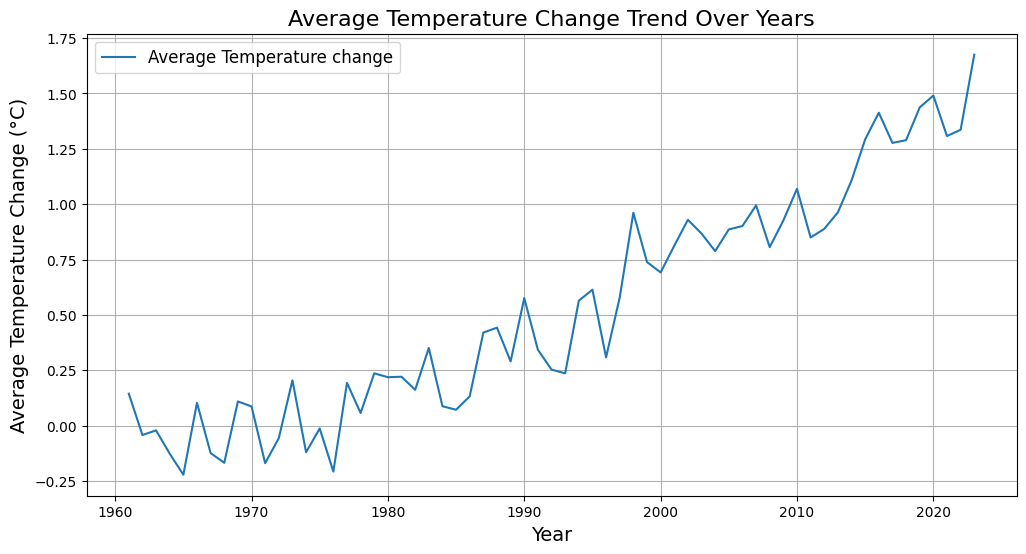

In [267]:
def plot_temperature_trend(data, element='Temperature change', title='Average Temperature Change Trend Over Years'):
    # Filter data for the specified element and calculate the mean temperature change per year
    element_data = data[data['Element'] == element]
    mean_temp_by_year = element_data.groupby('Year')['TempC'].mean()

    # Plotting the trend
    plt.figure(figsize=(12, 6))
    plt.plot(mean_temp_by_year.index, mean_temp_by_year.values, label=f'Average {element}')
    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()

# Use the function to plot the temperature trend
plot_temperature_trend(reshaped_data)


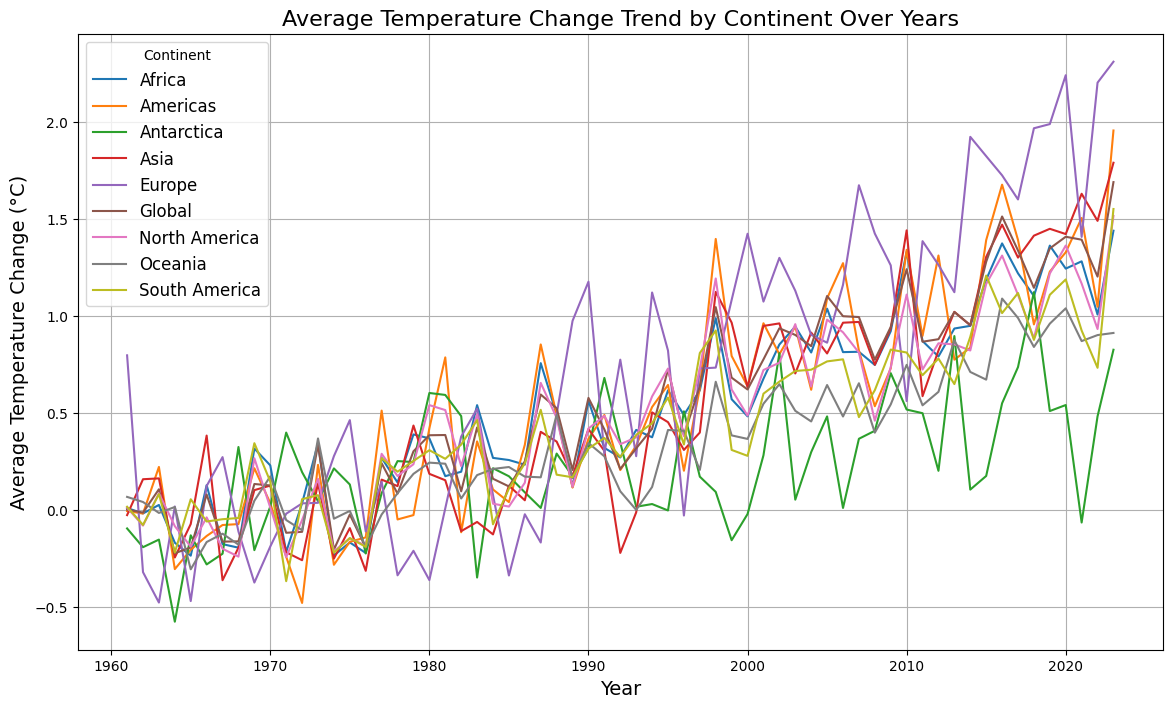

In [268]:
def plot_continent_temperature_trend(data, element='Temperature change', title='Average Temperature Change Trend by Continent Over Years'):

    # Filter data for the specified element and calculate the mean temperature change per year by continent
    element_data = data[data['Element'] == element]
    continent_temp_trend = element_data.groupby(['Year', 'Continent'])['TempC'].mean().unstack()

    # Plotting the trends for each continent
    plt.figure(figsize=(14, 8))
    for continent in continent_temp_trend.columns:
        plt.plot(continent_temp_trend.index, continent_temp_trend[continent], label=continent)

    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Continent', fontsize=12)
    plt.show()

# Use the function to plot the temperature trend by continent
plot_continent_temperature_trend(reshaped_data)


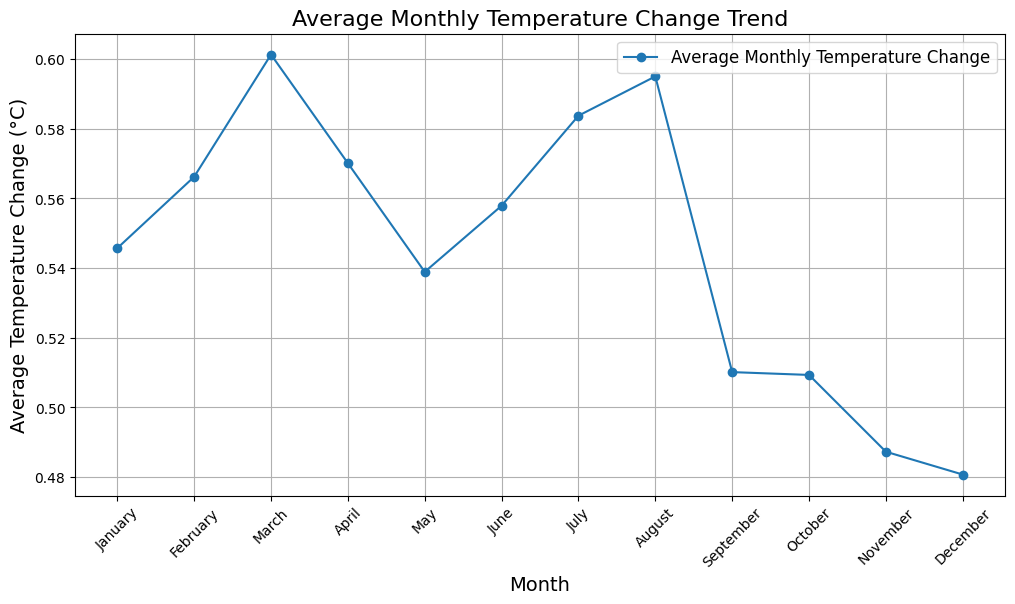

In [269]:
def plot_monthly_temperature_trend(data, element='Temperature change', title='Average Monthly Temperature Change Trend'):

    # Filter data for the specified element and calculate the mean temperature change per month
    element_data = data[data['Element'] == element]
    monthly_temp_trend = element_data.groupby('Months')['TempC'].mean()

    # Ensuring months are in proper order
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    monthly_temp_trend = monthly_temp_trend.reindex(month_order)

    # Plotting the trend
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_temp_trend.index, monthly_temp_trend.values, marker='o', linestyle='-', label='Average Monthly Temperature Change')
    plt.title(title, fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()

# Use the function to plot the monthly temperature trend
plot_monthly_temperature_trend(reshaped_data)


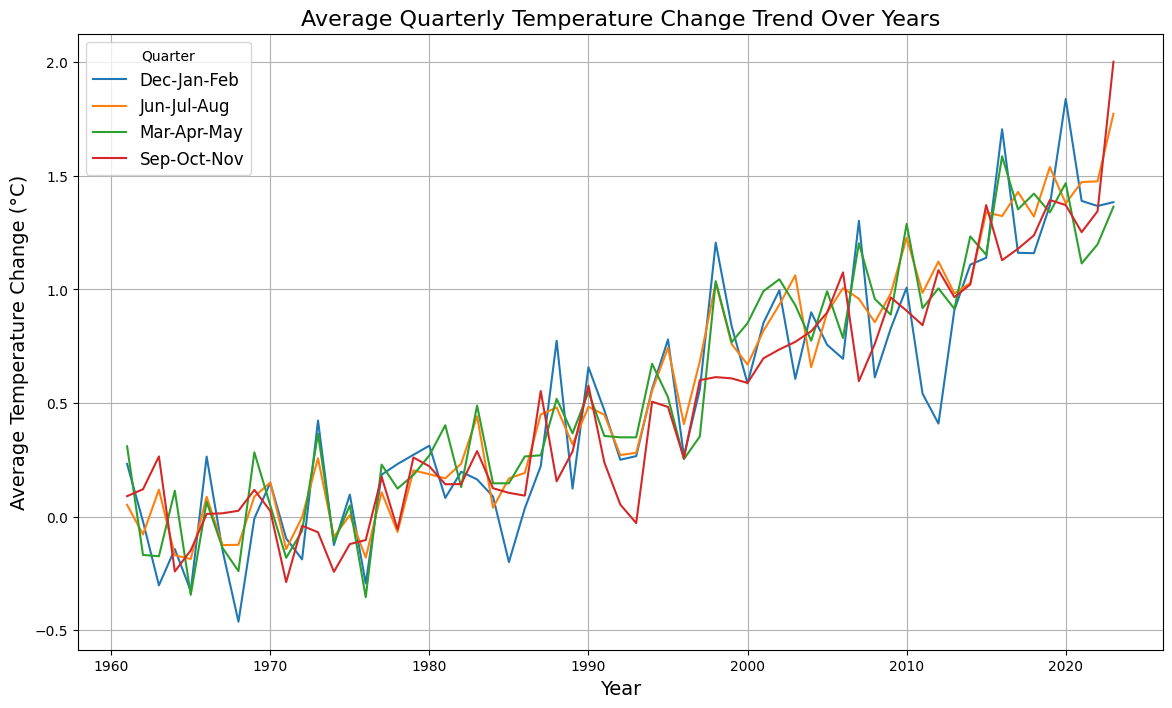

In [270]:
def plot_quarterly_trend_from_months(data, element='Temperature change', title='Average Quarterly Temperature Change Trend Over Years'):

    # Filter the data for rows corresponding to quarters and the specified element
    quarter_values = ['Dec-Jan-Feb', 'Mar-Apr-May', 'Jun-Jul-Aug', 'Sep-Oct-Nov']
    quarter_data = data[(data['Months'].isin(quarter_values)) & (data['Element'] == element)]

    # Calculate the mean temperature change for each quarter by year
    quarterly_temp_trend = quarter_data.groupby(['Year', 'Months'])['TempC'].mean().unstack()

    # Plot the trends for each quarter
    plt.figure(figsize=(14, 8))
    for quarter in quarterly_temp_trend.columns:
        plt.plot(quarterly_temp_trend.index, quarterly_temp_trend[quarter], label=quarter)

    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Quarter', fontsize=12)
    plt.show()

# Use the function to plot the quarterly temperature trend from explicit quarter values in 'Months'
plot_quarterly_trend_from_months(reshaped_data)


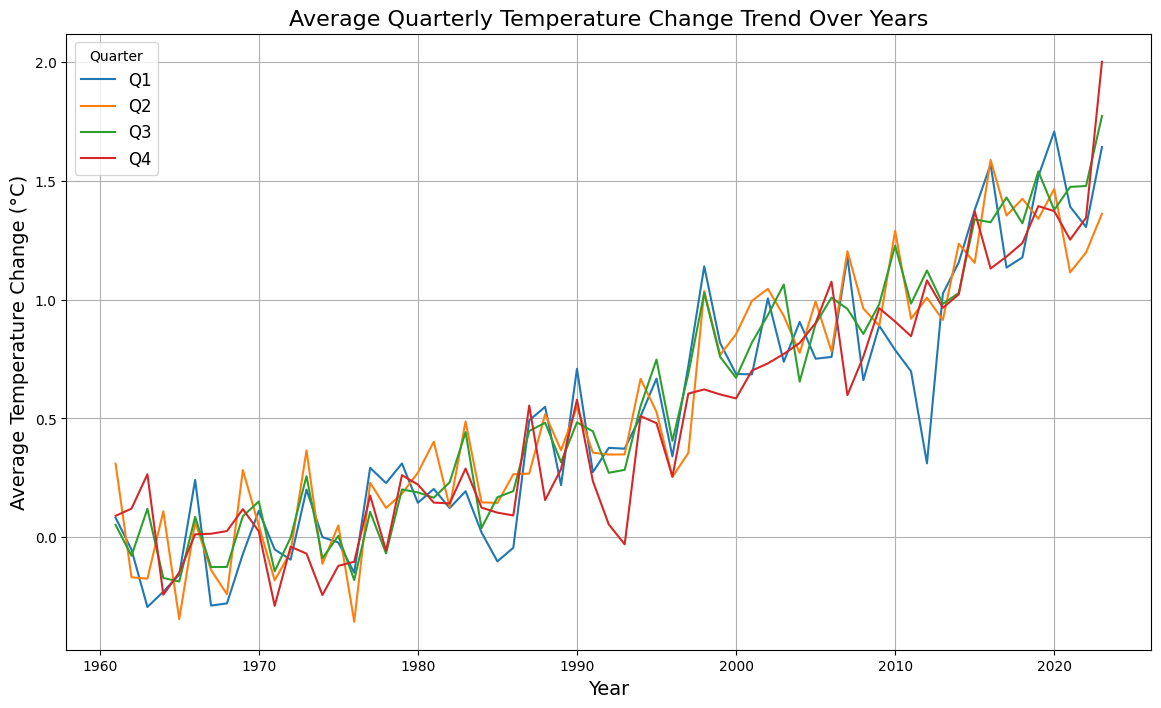

In [271]:
def plot_quarterly_temperature_trend(data, element='Temperature change', title='Average Quarterly Temperature Change Trend Over Years'):

    # Define mapping of months to quarters
    quarter_mapping = {
        'January': 'Q1', 'February': 'Q1', 'March': 'Q2',
        'April': 'Q2', 'May': 'Q2', 'June': 'Q3',
        'July': 'Q3', 'August': 'Q3', 'September': 'Q4',
        'October': 'Q4', 'November': 'Q4', 'December': 'Q1'
    }
    # Add a new column for quarters based on the month
    data['Quarter'] = data['Months'].map(quarter_mapping)

    # Filter data for the specified element and calculate the mean temperature change per year by quarter
    element_data = data[data['Element'] == element]
    quarterly_temp_trend = element_data.groupby(['Year', 'Quarter'])['TempC'].mean().unstack()

    # Plotting the trends for each quarter
    plt.figure(figsize=(14, 8))
    for quarter in quarterly_temp_trend.columns:
        plt.plot(quarterly_temp_trend.index, quarterly_temp_trend[quarter], label=quarter)

    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Quarter', fontsize=12)
    plt.show()

# Use the function to plot the quarterly temperature trend
plot_quarterly_temperature_trend(reshaped_data)


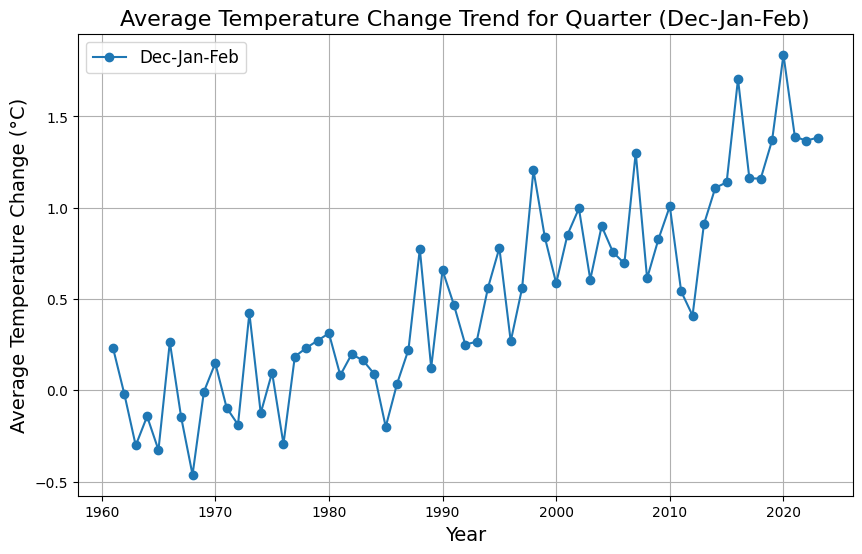

In [272]:
def plot_specific_quarter_trend(data, quarter, element='Temperature change', title_prefix='Average Temperature Change Trend for Quarter'):
    # Filter the data for the specified quarter and element
    quarter_data = data[(data['Months'] == quarter) & (data['Element'] == element)]

    # Calculate the mean temperature change for the specified quarter by year
    quarter_trend = quarter_data.groupby('Year')['TempC'].mean()

    # Plot the trend for the specified quarter
    plt.figure(figsize=(10, 6))
    plt.plot(quarter_trend.index, quarter_trend.values, marker='o', linestyle='-', label=quarter)
    plt.title(f"{title_prefix} ({quarter})", fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()

# Example: Plot for the quarter 'Dec-Jan-Feb'
plot_specific_quarter_trend(reshaped_data, 'Dec-Jan-Feb')

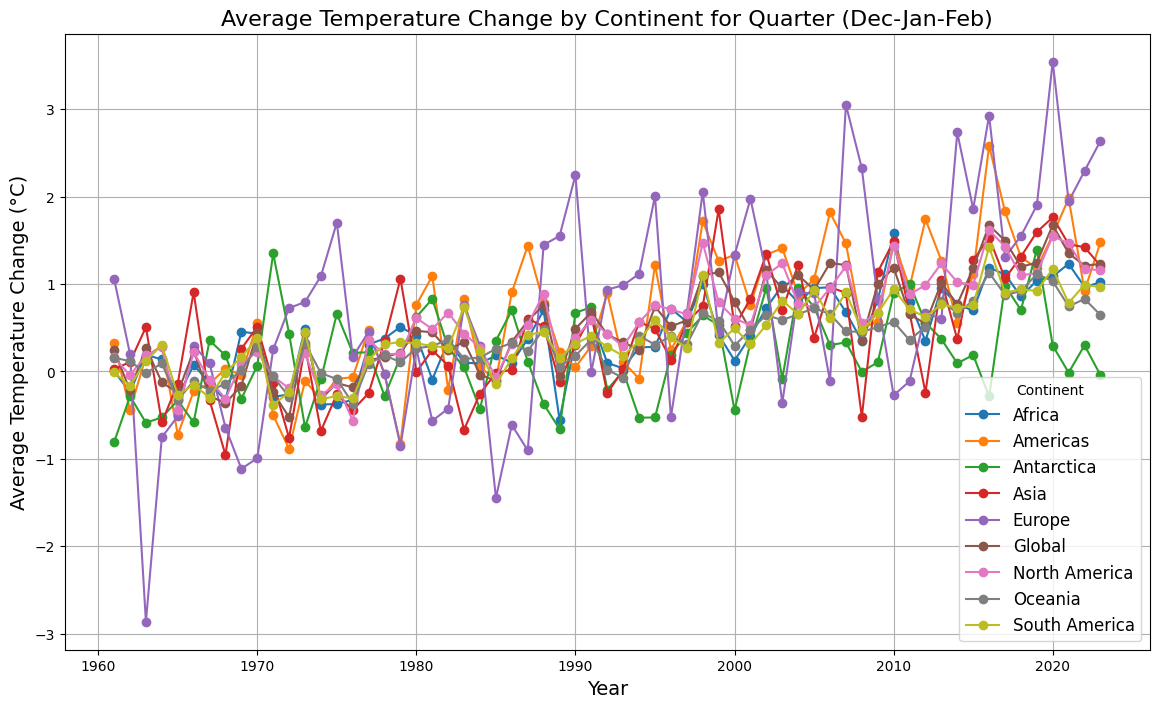

In [273]:
def plot_continent_trend_for_quarter(data, quarter, element='Temperature change', title_prefix='Average Temperature Change by Continent for Quarter'):

    # Filter the data for the specified quarter and element
    quarter_data = data[(data['Months'] == quarter) & (data['Element'] == element)]

    # Calculate the mean temperature change for each continent by year
    continent_trend = quarter_data.groupby(['Year', 'Continent'])['TempC'].mean().unstack()

    # Plot the trends for each continent
    plt.figure(figsize=(14, 8))
    for continent in continent_trend.columns:
        plt.plot(continent_trend.index, continent_trend[continent], marker='o', linestyle='-', label=continent)

    plt.title(f"{title_prefix} ({quarter})", fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Continent', fontsize=12)
    plt.show()

# Example: Plot for 'Dec-Jan-Feb' showing trends by continent
plot_continent_trend_for_quarter(reshaped_data, 'Dec-Jan-Feb')


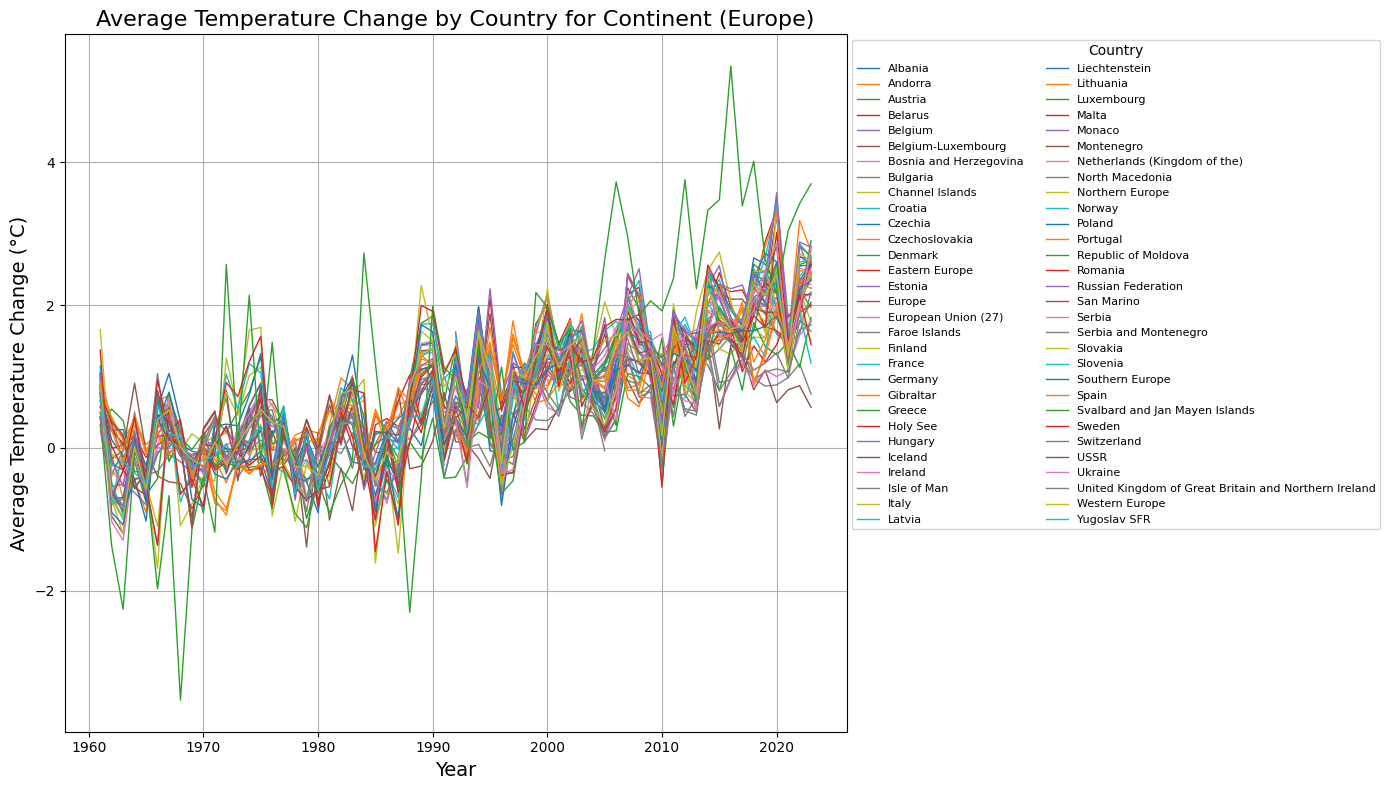

In [274]:
def plot_all_countries_trend_for_continent(data, continent, element='Temperature change', title_prefix='Average Temperature Change by Country for Continent'):

    # Filter the data for the specified continent and element
    continent_data = data[(data['Continent'] == continent) & (data['Element'] == element)]

    # Calculate the mean temperature change for each country by year
    country_trend = continent_data.groupby(['Year', 'Area'])['TempC'].mean().unstack()

    # Plot the trends for each country
    plt.figure(figsize=(14, 8))
    for country in country_trend.columns:
        plt.plot(country_trend.index, country_trend[country], marker='', linestyle='-', linewidth=1, label=country)

    plt.title(f"{title_prefix} ({continent})", fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Country', fontsize=8, loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.tight_layout()
    plt.show()

# Example: Plot for all countries in the continent 'Asia'
plot_all_countries_trend_for_continent(reshaped_data, 'Europe')

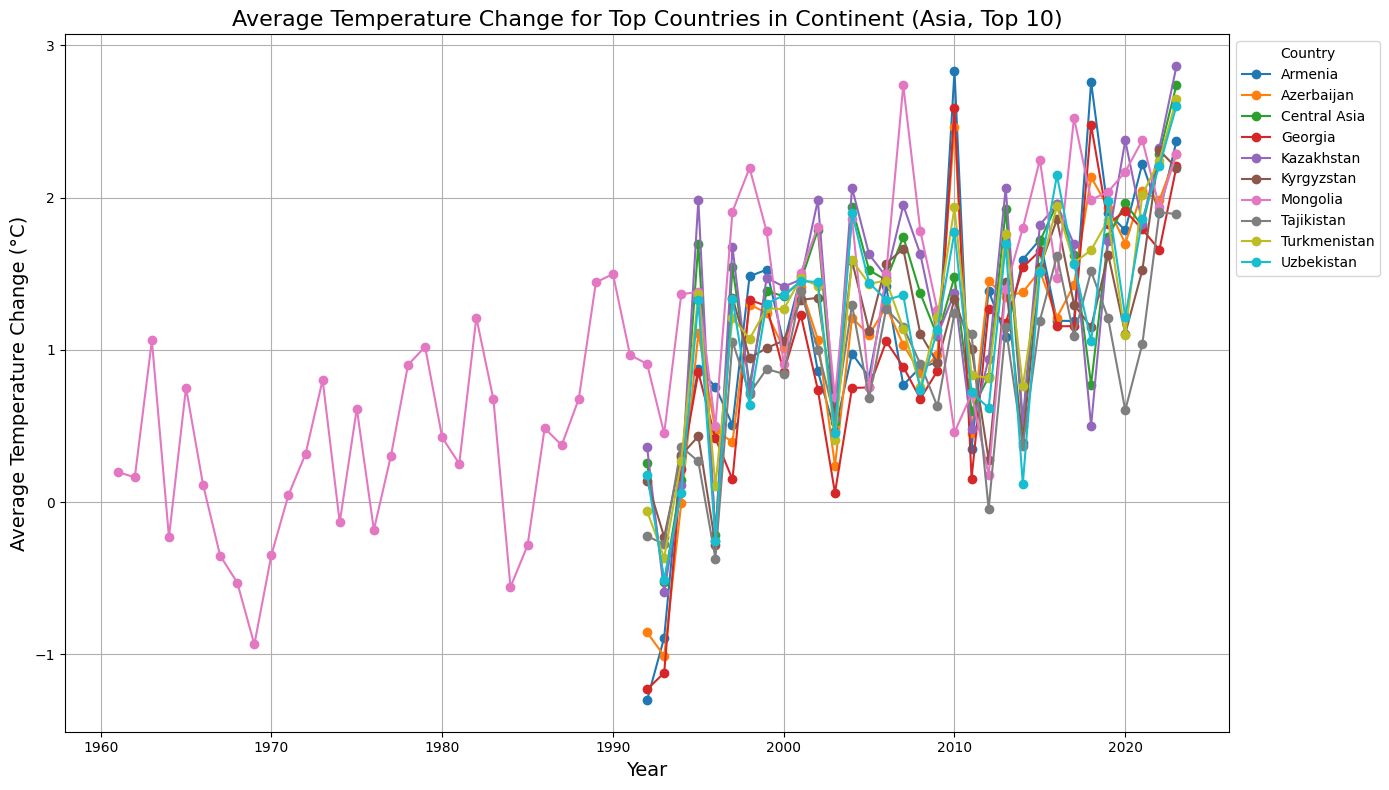

In [275]:
def plot_top_countries_trend_for_continent(data, continent, top_n=10, element='Temperature change', title_prefix='Average Temperature Change for Top Countries in Continent'):

    # Filter the data for the specified continent and element
    continent_data = data[(data['Continent'] == continent) & (data['Element'] == element)]

    # Calculate the overall average temperature change for each country
    country_avg_temp_change = continent_data.groupby('Area')['TempC'].mean().sort_values(ascending=False).head(top_n)

    # Filter the data for only the top N countries
    top_countries_data = continent_data[continent_data['Area'].isin(country_avg_temp_change.index)]

    # Calculate the mean temperature change for each country by year
    country_trend = top_countries_data.groupby(['Year', 'Area'])['TempC'].mean().unstack()

    # Plot the trends for each country
    plt.figure(figsize=(14, 8))
    for country in country_trend.columns:
        plt.plot(country_trend.index, country_trend[country], marker='o', linestyle='-', label=country)

    plt.title(f"{title_prefix} ({continent}, Top {top_n})", fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Temperature Change (°C)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Country', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Example: Plot for the top 10 countries in the continent 'Asia'
plot_top_countries_trend_for_continent(reshaped_data, 'Asia', top_n=10)


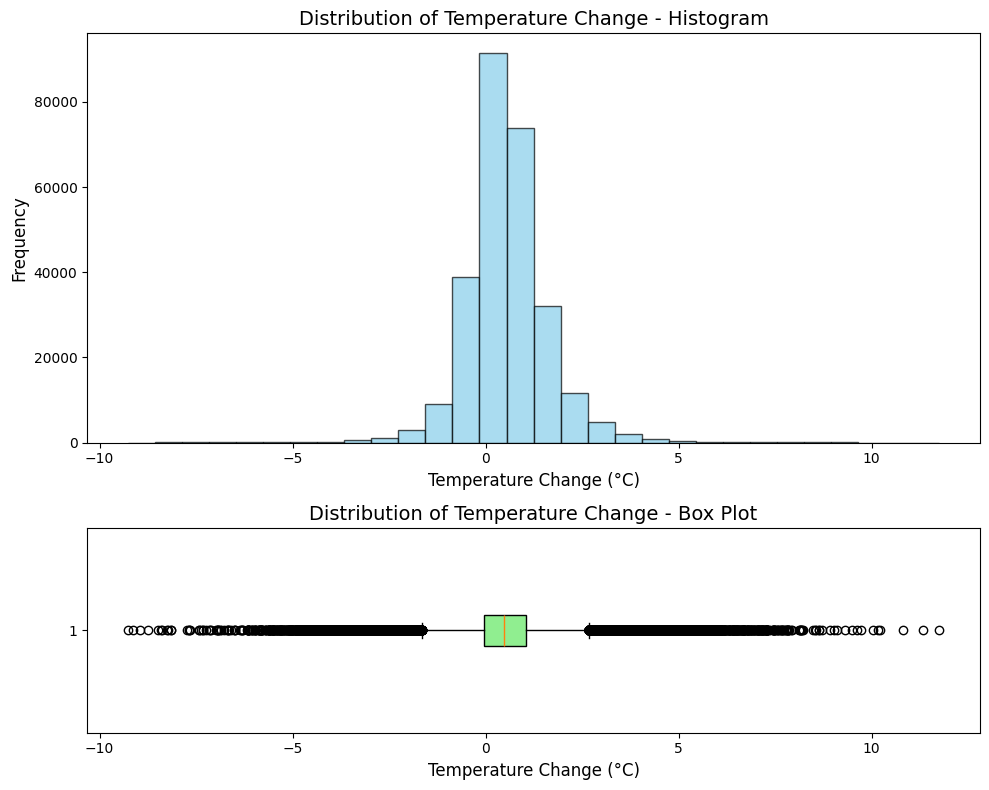

In [276]:
import matplotlib.pyplot as plt

def plot_distribution(data, element='Temperature change', title='Distribution of Temperature Change'):
    """
    Creates a subplot with a histogram and a box plot to visualize the distribution of temperature change.

    Parameters:
    - data (DataFrame): The reshaped data containing 'Element' and 'TempC'.
    - element (str): The type of temperature element to filter (default: 'Temperature change').
    - title (str): Title of the plot.
    """
    # Filter data for the specified element
    element_data = data[data['Element'] == element]['TempC'].dropna()

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})
    
    # Box plot
    axes[1].boxplot(element_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))
    axes[1].set_title(f'{title} - Box Plot', fontsize=14)
    axes[1].set_xlabel('Temperature Change (°C)', fontsize=12)
    
    # Histogram
    axes[0].hist(element_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_title(f'{title} - Histogram', fontsize=14)
    axes[0].set_xlabel('Temperature Change (°C)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot distribution for temperature change
plot_distribution(reshaped_data)


C:\Users\VincentPham\AppData\Local\Temp\ipykernel_22276\4182876659.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


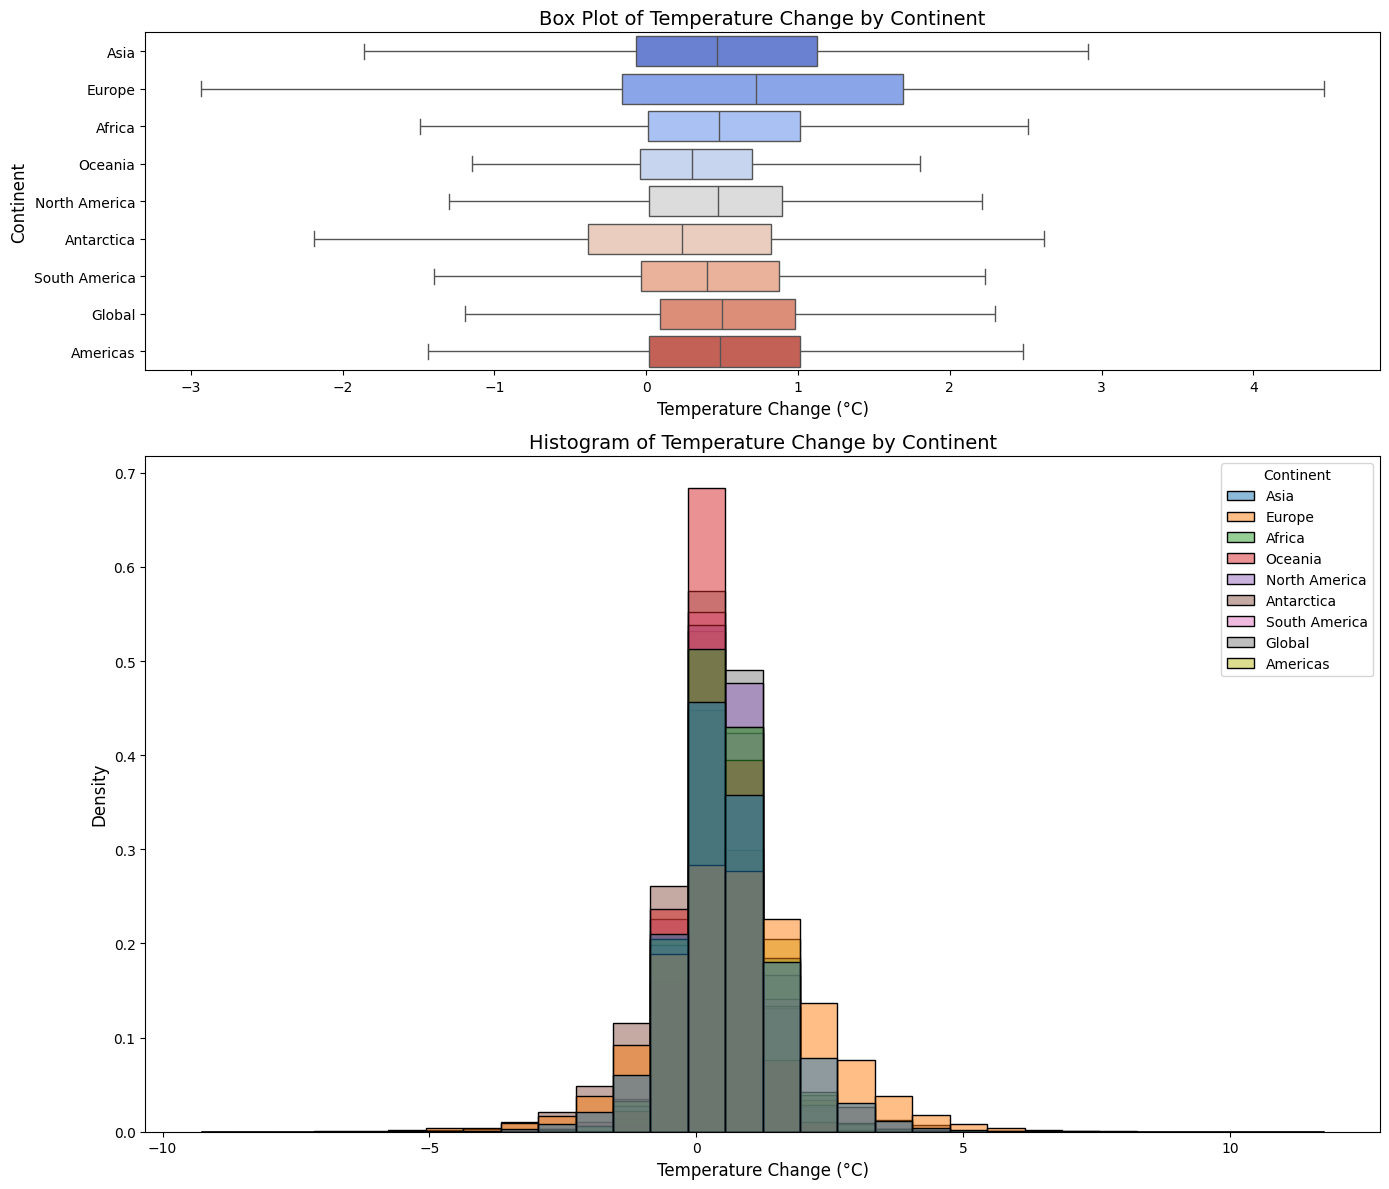

In [277]:
def plot_refined_continent_distribution(data, element='Temperature change', title_prefix='Temperature Change by Continent'):
    """
    Creates a refined plot with a box plot and a histogram to visualize the temperature change distribution by continent.

    Parameters:
    - data (DataFrame): The reshaped data containing 'Continent', 'Element', and 'TempC'.
    - element (str): The type of temperature element to filter (default: 'Temperature change').
    - title_prefix (str): Prefix for the title of the plots.
    """
    # Filter data for the specified element
    element_data = data[data['Element'] == element]

    # Create the figure and axes
    fig, axes = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 2]})
    
    # Box plot
    sns.boxplot(
        ax=axes[0], 
        data=element_data, 
        x='TempC', 
        y='Continent', 
        orient='h', 
        palette='coolwarm', 
        showfliers=False
    )
    axes[0].set_title(f'Box Plot of {title_prefix}', fontsize=14)
    axes[0].set_xlabel('Temperature Change (°C)', fontsize=12)
    axes[0].set_ylabel('Continent', fontsize=12)
    
    # Refined Histogram
    sns.histplot(
        ax=axes[1],
        data=element_data,
        x='TempC',
        hue='Continent',
        element='bars',
        stat='density',
        common_norm=False,
        palette='tab10',
        bins=30,
        alpha=0.5
    )
    axes[1].set_title(f'Histogram of {title_prefix}', fontsize=14)
    axes[1].set_xlabel('Temperature Change (°C)', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot refined continent distribution for temperature change
plot_refined_continent_distribution(reshaped_data)


C:\Users\VincentPham\AppData\Local\Temp\ipykernel_22276\1827690659.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\VincentPham\AppData\Local\Temp\ipykernel_22276\1827690659.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


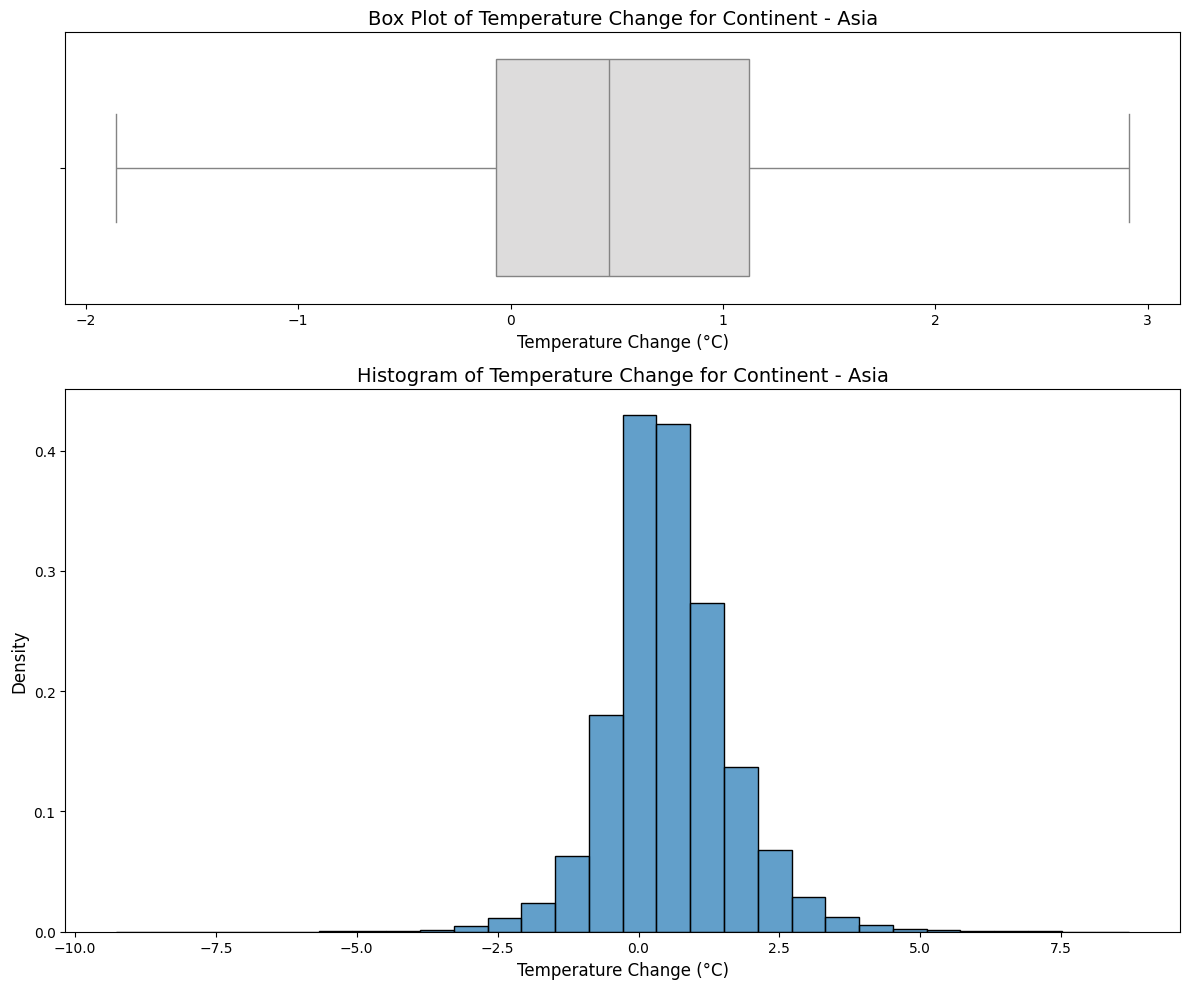

In [278]:
def plot_refined_each_continent_distribution(data, continent, element='Temperature change', title_prefix='Temperature Change for Continent'):

    # Filter data for the specified element and continent
    element_data = data[(data['Element'] == element) & (data['Continent'] == continent)]

    # Create the figure and axes
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 2]})
    
    # Box plot
    sns.boxplot(
        ax=axes[0], 
        data=element_data, 
        x='TempC', 
        orient='h', 
        palette='coolwarm', 
        showfliers=False
    )
    axes[0].set_title(f'Box Plot of {title_prefix} - {continent}', fontsize=14)
    axes[0].set_xlabel('Temperature Change (°C)', fontsize=12)
    
    # Histogram
    sns.histplot(
        ax=axes[1],
        data=element_data,
        x='TempC',
        stat='density',
        common_norm=False,
        palette='tab10',
        bins=30,
        alpha=0.7
    )
    axes[1].set_title(f'Histogram of {title_prefix} - {continent}', fontsize=14)
    axes[1].set_xlabel('Temperature Change (°C)', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example: Plot for 'Asia'
plot_refined_each_continent_distribution(reshaped_data, 'Asia')


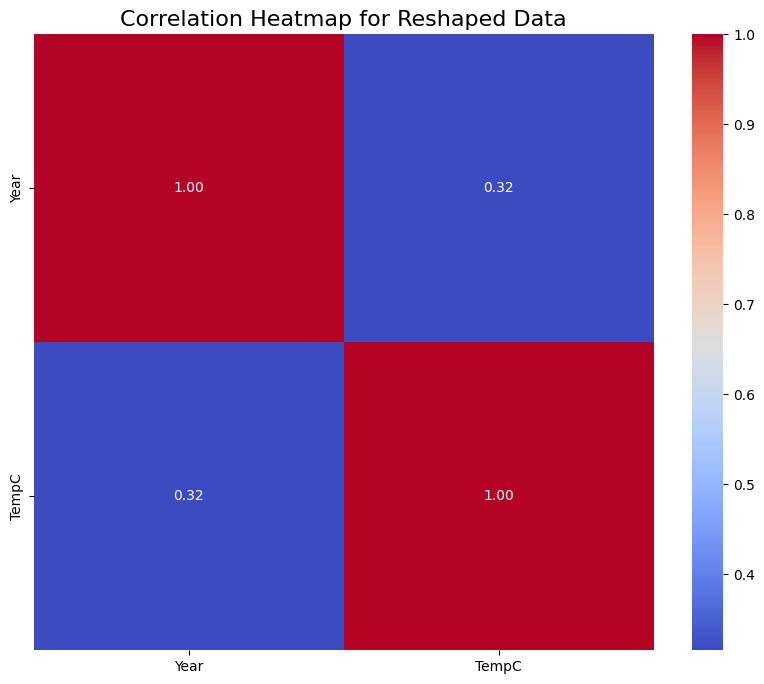

In [279]:
def plot_correlation_heatmap(data, title='Correlation Heatmap', figsize=(10, 8)):
    """
    Plots a correlation heatmap for the given dataset.

    Parameters:
    - data (DataFrame): The reshaped data containing variables to analyze correlations.
    - title (str): Title of the heatmap.
    - figsize (tuple): Size of the heatmap figure.
    """
    # Calculate the correlation matrix for numerical variables
    correlation_matrix = data.corr(numeric_only=True)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(title, fontsize=16)
    plt.show()

# Applying the function to the reshaped data
# Only selecting numeric columns for correlation
plot_correlation_heatmap(reshaped_data, title="Correlation Heatmap for Reshaped Data")


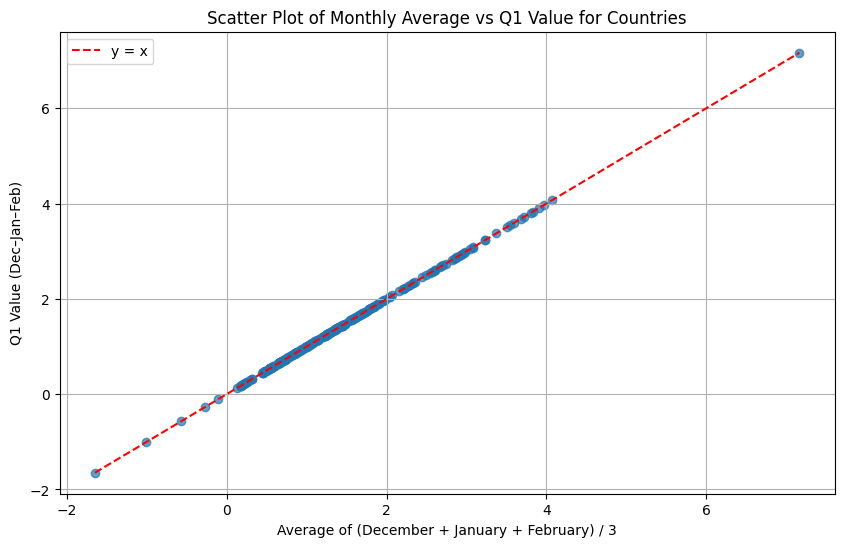

,Area,Avg_3_Months,Q1_Value
Months,,,
0,Afghanistan,0.643000,0.643
1,Africa,0.995333,0.997
2,Albania,2.226667,2.227
3,Algeria,1.434333,1.434
4,American Samoa,0.286667,0.287


In [280]:
def analyze_and_visualize_quarterly_correlation(df):

    # Step 1: Clean and filter the data
    data_copy = df.copy()
    data_copy['Months'] = data_copy['Months'].str.replace('\x96', '–')

    # Filter data for temperature change and valid months
    valid_months = [
        'January', 'February', 'December', 'Dec–Jan–Feb'
    ]
    data_filtered = data_copy[
        (data_copy['Element'] == 'Temperature change') &
        (data_copy['Months'].isin(valid_months))
    ]

    # Step 2: Identify missing data for years 2022 and 2023
    data_filtered = data_filtered[['Area', 'Months', 'Y2022', 'Y2023']]
    data_missing = data_filtered[
        (data_filtered['Y2022'].isnull()) | (data_filtered['Y2023'].isnull())
    ]
    missing_countries = data_missing['Area'].unique()

    # Step 3: Filter out rows for countries with missing data
    filtered_data = data_filtered[
        ~data_filtered['Area'].isin(missing_countries)
    ]

    # Step 4: Pivot the data to separate months and Q1 values
    grouped_data = filtered_data.groupby(['Area', 'Months']).mean().reset_index()
    pivoted_data = grouped_data.pivot(index='Area', columns='Months', values=['Y2022', 'Y2023']).reset_index()

    # Calculate the average of December 2022, January 2023, February 2023
    pivoted_data['Avg_3_Months'] = (
        pivoted_data[('Y2022', 'December')] +
        pivoted_data[('Y2023', 'January')] +
        pivoted_data[('Y2023', 'February')]
    ) / 3

    # Extract the Q1 value (Dec–Jan–Feb 2023)
    pivoted_data['Q1_Value'] = pivoted_data[('Y2023', 'Dec–Jan–Feb')]

    # Step 5: Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(pivoted_data['Avg_3_Months'], pivoted_data['Q1_Value'], alpha=0.7)
    
    # Add a diagonal reference line (y = x)
    min_val = min(pivoted_data['Avg_3_Months'].min(), pivoted_data['Q1_Value'].min())
    max_val = max(pivoted_data['Avg_3_Months'].max(), pivoted_data['Q1_Value'].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

    # Set plot labels and title
    plt.xlabel('Average of (December + January + February) / 3')
    plt.ylabel('Q1 Value (Dec–Jan–Feb)')
    plt.title('Scatter Plot of Monthly Average vs Q1 Value for Countries')
    plt.legend()
    plt.grid(True)
    plt.show()

    return pivoted_data[['Area', 'Avg_3_Months', 'Q1_Value']]

# Use the function
result = analyze_and_visualize_quarterly_correlation(df)
result.head()

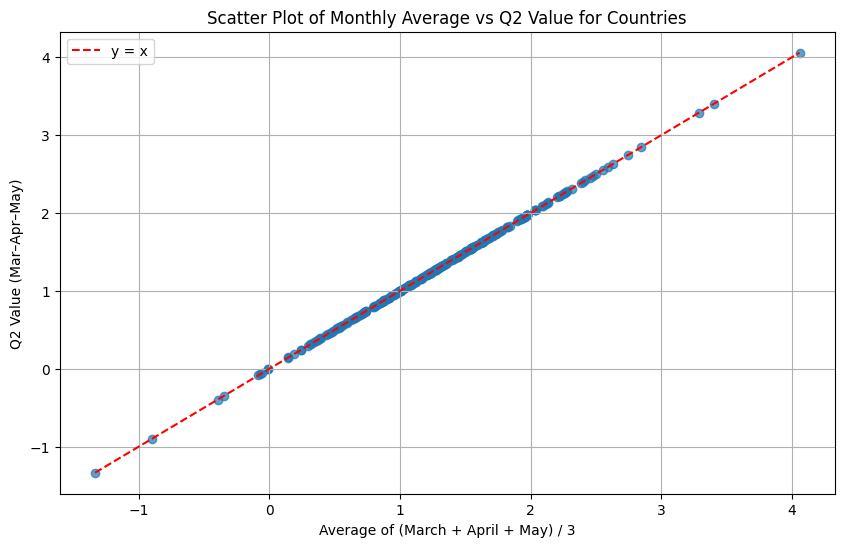

Months,Area,Avg_3_Months,Q2_Value
0,Afghanistan,2.593000,2.593
1,Africa,1.777667,1.777
2,Albania,1.271000,1.271
3,Algeria,2.748333,2.748
4,American Samoa,1.541667,1.542


In [281]:
def analyze_and_visualize_quarterly2_correlation(df):
    """
    Analyzes the relationship between the average of three months and the Q2 value (Mar–Apr–May) for a given dataset.
    Produces a scatter plot to visualize the correlation.

    Parameters:
    - df (DataFrame): The raw dataset containing 'Area', 'Months', and relevant columns.

    Returns:
    - A scatter plot visualizing the relationship.
    """
    import matplotlib.pyplot as plt

    # Step 1: Clean and filter the data
    data_copy = df.copy()
    data_copy['Months'] = data_copy['Months'].str.replace('\x96', '–')

    # Filter data for temperature change and valid months
    valid_months = [
        'March', 'April', 'May', 'Mar–Apr–May'
    ]
    data_filtered = data_copy[
        (data_copy['Element'] == 'Temperature change') &
        (data_copy['Months'].isin(valid_months))
    ]

    # Step 2: Identify missing data for year 2010
    data_filtered = data_filtered[['Area', 'Months', 'Y2010']]
    data_missing = data_filtered[data_filtered['Y2010'].isnull()]
    missing_countries = data_missing['Area'].unique()

    # Step 3: Filter out rows for countries with missing data
    filtered_data = data_filtered[~data_filtered['Area'].isin(missing_countries)]

    # Step 4: Pivot the data to separate months and Q2 values
    grouped_data = filtered_data.groupby(['Area', 'Months']).mean().reset_index()
    pivoted_data = grouped_data.pivot(index='Area', columns='Months', values='Y2010').reset_index()

    # Check if required columns exist
    if {'March', 'April', 'May', 'Mar–Apr–May'}.issubset(pivoted_data.columns):
        # Calculate the average of March, April, May
        pivoted_data['Avg_3_Months'] = (
            pivoted_data['March'] +
            pivoted_data['April'] +
            pivoted_data['May']
        ) / 3

        # Extract the Q2 value (Mar–Apr–May)
        pivoted_data['Q2_Value'] = pivoted_data['Mar–Apr–May']

        # Step 5: Create the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(pivoted_data['Avg_3_Months'], pivoted_data['Q2_Value'], alpha=0.7)
        
        # Add a diagonal reference line (y = x)
        min_val = min(pivoted_data['Avg_3_Months'].min(), pivoted_data['Q2_Value'].min())
        max_val = max(pivoted_data['Avg_3_Months'].max(), pivoted_data['Q2_Value'].max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

        # Set plot labels and title
        plt.xlabel('Average of (March + April + May) / 3')
        plt.ylabel('Q2 Value (Mar–Apr–May)')
        plt.title('Scatter Plot of Monthly Average vs Q2 Value for Countries')
        plt.legend()
        plt.grid(True)
        plt.show()

        return pivoted_data[['Area', 'Avg_3_Months', 'Q2_Value']]
    else:
        print("Required columns ('March', 'April', 'May', 'Mar–Apr–May') are missing.")
        return None

# Use the function
result2 = analyze_and_visualize_quarterly2_correlation(df)
result2.head() if result2 is not None else None


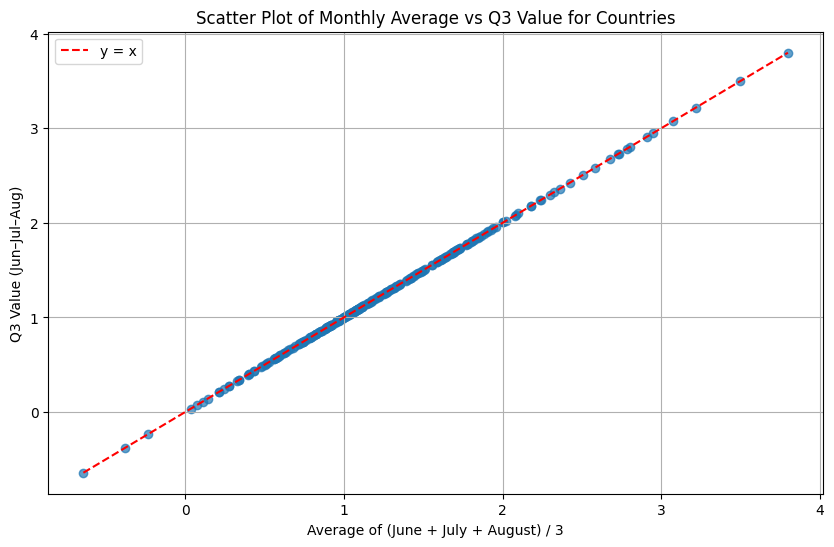

Months,Area,Avg_3_Months,Q3_Value
0,Afghanistan,0.599333,0.599
1,Africa,1.106667,1.107
2,Albania,1.607000,1.607
3,Algeria,1.730000,1.730
4,American Samoa,1.076333,1.076


In [282]:
def analyze_and_visualize_quarterly3_correlation(df):
    """
    Analyzes the relationship between the average of three months and the Q3 value (Jun–Jul–Aug) for a given dataset.
    Produces a scatter plot to visualize the correlation.

    Parameters:
    - df (DataFrame): The raw dataset containing 'Area', 'Months', and relevant columns.

    Returns:
    - A scatter plot visualizing the relationship.
    """
    import matplotlib.pyplot as plt

    # Step 1: Clean and filter the data
    data_copy = df.copy()
    data_copy['Months'] = data_copy['Months'].str.replace('\x96', '–')

    # Filter data for temperature change and valid months
    valid_months = [
        'June', 'July', 'August', 'Jun–Jul–Aug'
    ]
    data_filtered = data_copy[
        (data_copy['Element'] == 'Temperature change') &
        (data_copy['Months'].isin(valid_months))
    ]

    # Step 2: Identify missing data for year 2010
    data_filtered = data_filtered[['Area', 'Months', 'Y2010']]
    data_missing = data_filtered[data_filtered['Y2010'].isnull()]
    missing_countries = data_missing['Area'].unique()

    # Step 3: Filter out rows for countries with missing data
    filtered_data = data_filtered[~data_filtered['Area'].isin(missing_countries)]

    # Step 4: Pivot the data to separate months and Q3 values
    grouped_data = filtered_data.groupby(['Area', 'Months']).mean().reset_index()
    pivoted_data = grouped_data.pivot(index='Area', columns='Months', values='Y2010').reset_index()

    # Check if required columns exist
    if {'June', 'July', 'August', 'Jun–Jul–Aug'}.issubset(pivoted_data.columns):
        # Calculate the average of June, July, August
        pivoted_data['Avg_3_Months'] = (
            pivoted_data['June'] +
            pivoted_data['July'] +
            pivoted_data['August']
        ) / 3

        # Extract the Q3 value (Jun–Jul–Aug)
        pivoted_data['Q3_Value'] = pivoted_data['Jun–Jul–Aug']

        # Step 5: Create the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(pivoted_data['Avg_3_Months'], pivoted_data['Q3_Value'], alpha=0.7)
        
        # Add a diagonal reference line (y = x)
        min_val = min(pivoted_data['Avg_3_Months'].min(), pivoted_data['Q3_Value'].min())
        max_val = max(pivoted_data['Avg_3_Months'].max(), pivoted_data['Q3_Value'].max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

        # Set plot labels and title
        plt.xlabel('Average of (June + July + August) / 3')
        plt.ylabel('Q3 Value (Jun–Jul–Aug)')
        plt.title('Scatter Plot of Monthly Average vs Q3 Value for Countries')
        plt.legend()
        plt.grid(True)
        plt.show()

        return pivoted_data[['Area', 'Avg_3_Months', 'Q3_Value']]
    else:
        print("Required columns ('June', 'July', 'August', 'Jun–Jul–Aug') are missing.")
        return None
    
result3 = analyze_and_visualize_quarterly3_correlation(df)
result3.head() if result3 is not None else None

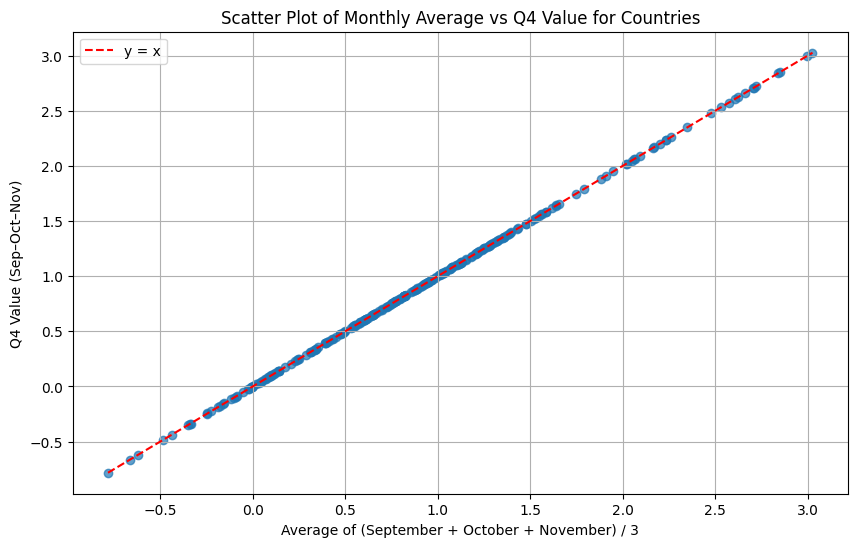

Months,Area,Avg_3_Months,Q4_Value
0,Afghanistan,1.477333,1.477
1,Africa,1.301000,1.301
2,Albania,0.931667,0.932
3,Algeria,1.550333,1.550
4,American Samoa,0.776333,0.776


In [284]:
def analyze_and_visualize_quarterly4_correlation(df):
    """
    Analyzes the relationship between the average of three months and the Q4 value (Sep–Oct–Nov) for a given dataset.
    Produces a scatter plot to visualize the correlation.

    Parameters:
    - df (DataFrame): The raw dataset containing 'Area', 'Months', and relevant columns.

    Returns:
    - A scatter plot visualizing the relationship.
    """
    import matplotlib.pyplot as plt

    # Step 1: Clean and filter the data
    data_copy = df.copy()
    data_copy['Months'] = data_copy['Months'].str.replace('\x96', '–')

    # Filter data for temperature change and valid months
    valid_months = [
        'September', 'October', 'November', 'Sep–Oct–Nov'
    ]
    data_filtered = data_copy[
        (data_copy['Element'] == 'Temperature change') &
        (data_copy['Months'].isin(valid_months))
    ]

    # Step 2: Identify missing data for year 2010
    data_filtered = data_filtered[['Area', 'Months', 'Y2010']]
    data_missing = data_filtered[data_filtered['Y2010'].isnull()]
    missing_countries = data_missing['Area'].unique()

    # Step 3: Filter out rows for countries with missing data
    filtered_data = data_filtered[~data_filtered['Area'].isin(missing_countries)]

    # Step 4: Pivot the data to separate months and Q4 values
    grouped_data = filtered_data.groupby(['Area', 'Months']).mean().reset_index()
    pivoted_data = grouped_data.pivot(index='Area', columns='Months', values='Y2010').reset_index()

    # Check if required columns exist
    if {'September', 'October', 'November', 'Sep–Oct–Nov'}.issubset(pivoted_data.columns):
        # Calculate the average of September, October, November
        pivoted_data['Avg_3_Months'] = (
            pivoted_data['September'] +
            pivoted_data['October'] +
            pivoted_data['November']
        ) / 3

        # Extract the Q4 value (Sep–Oct–Nov)
        pivoted_data['Q4_Value'] = pivoted_data['Sep–Oct–Nov']

        # Step 5: Create the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(pivoted_data['Avg_3_Months'], pivoted_data['Q4_Value'], alpha=0.7)
        
        # Add a diagonal reference line (y = x)
        min_val = min(pivoted_data['Avg_3_Months'].min(), pivoted_data['Q4_Value'].min())
        max_val = max(pivoted_data['Avg_3_Months'].max(), pivoted_data['Q4_Value'].max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

        # Set plot labels and title
        plt.xlabel('Average of (September + October + November) / 3')
        plt.ylabel('Q4 Value (Sep–Oct–Nov)')
        plt.title('Scatter Plot of Monthly Average vs Q4 Value for Countries')
        plt.legend()
        plt.grid(True)
        plt.show()

        return pivoted_data[['Area', 'Avg_3_Months', 'Q4_Value']]
    else:
        print("Required columns ('September', 'October', 'November', 'Sep–Oct–Nov') are missing.")
        return None
    
result4 = analyze_and_visualize_quarterly4_correlation(df)
result4.head() if result4 is not None else None